# Proyek Analisis Data: BIKE SHARING DATASET
- **Nama:** ROIS HOIRON
- **Email:** rois.khoiron@gmail.com
- **ID Dicoding:** khoironrois

## Menentukan Pertanyaan Bisnis

1. `Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?`
   - Apakah ada pola tertentu dalam jumlah penyewaan sepeda berdasarkan suhu, kelembaban, atau curah hujan?

2. `Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?`
   - Apakah ada perbedaan signifikan dalam jumlah penyewaan sepeda antara musim panas, musim gugur, musim dingin, danmusim semi?`

3. `Bagaimana pengaruh hari dalam minggu terhadap jumlah penyewaan sepeda?`
   - Apakah ada perbedaan dalam jumlah penyewaan sepeda antara hari kerja dan akhir pekan?

4. `Bagaimana pengaruh jam dalam sehari terhadap jumlah penyewaan sepeda?`
   - Apakah ada jam-jam tertentu dalam sehari yang menunjukkan puncak penyewaan sepeda?

5. `Apakah ada peristiwa atau anomali yang mempengaruhi jumlah penyewaan sepeda?`
   - Apakah ada peristiwa khusus yang menyebabkan lonjakan atau penurunan jumlah penyewaan sepeda?

6. `Bagaimana tren jumlah penyewaan sepeda dari waktu ke waktu?`
   - Apakah ada tren peningkatan atau penurunan dalam jumlah penyewaan sepeda dari tahun 2011 ke 2012?

7. `Bagaimana pengaruh variabel lain seperti kecepatan angin dan visibilitas terhadap jumlah penyewaan sepeda?`
   - Apakah variabel-variabel ini memiliki korelasi yang signifikan dengan jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [128]:
# Daftar library yang digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore
from sklearn.linear_model import LinearRegression # type: ignore

## Data Wrangling

### Gathering Data

##### 1. Mendapatkan data penyewaan sepeda yang diakumulasi setiap jam

In [129]:
hourly_df = pd.read_csv('data/hour.csv')
hourly_df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### 2. Mendapatkan data penyewaan sepeda yang diakumulasi setiap hari

In [130]:
daily_df = pd.read_csv('data/day.csv')
daily_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- terdapat 17 kolom pada data penyewaan harian dan 16 kolom pada data penyewaan jam-an, 
  yang membedakan yakni adanya kolom `hr` di data penyewaan jam-an.
- Berikut informasi kolom
    + instant: indeks catatan
	+ dteday : tanggal
	+ season : musim (1:musim semi, 2:musim panas, 3:musim gugur, 4:musim dingin)
	+ yr : tahun (0: 2011, 1:2012)
	+ mnth : bulan (1 sampai 12)
	+ hr : jam (0 sampai 23)
	+ holiday : apakah hari itu libur atau tidak (diambil dari http://dchr.dc.gov/page/holiday-schedule)
	+ weekday : hari dalam minggu
	+ workingday : jika hari tersebut bukan akhir pekan atau libur, nilainya adalah 1, sebaliknya adalah 0.
	+ weathersit : 
		+ 1: Cerah, Sedikit awan, Sebagian berawan
		+ 2: Kabut + Berawan, Kabut + Awan terpecah, Kabut + Sedikit awan, Kabut
		+ 3: Salju ringan, Hujan ringan + Badai + Awan terpecah, Hujan ringan + Awan terpecah
		+ 4: Hujan lebat + Es + Badai + Kabut, Salju + Kabut
	+ temp : Suhu yang dinormalisasi dalam Celsius. Nilai dibagi dengan 41 (maksimum)
	+ atemp: Suhu yang dirasakan dinormalisasi dalam Celsius. Nilai dibagi dengan 50 (maksimum)
	+ hum: Kelembaban yang dinormalisasi. Nilai dibagi dengan 100 (maksimum)
	+ windspeed: Kecepatan angin yang dinormalisasi. Nilai dibagi dengan 67 (maksimum)
	+ casual: jumlah pengguna kasual
	+ registered: jumlah pengguna terdaftar
	+ cnt: jumlah total penyewaan sepeda termasuk pengguna kasual dan terdaftar

### Assessing Data

#### 1. Menilai kualitas data penyewaan sepeda yang diakumulasi setiap hari

> #####  Memeriksan Tipe data, Missing value dan Null data

In [131]:
print('Jumlah data duplikat pada data daily_df:', daily_df.duplicated().sum())
daily_df.info()

Jumlah data duplikat pada data daily_df: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


> #####  Memeriksan Parameter Statistik

In [132]:
daily_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### 2. Menilai kualitas data penyewaan sepeda yang diakumulasi setiap hari

> #####  Memeriksan Tipe data, Missing value dan Null data

In [133]:
print('Jumlah data duplikat pada data hourly_df:', hourly_df.duplicated().sum())
hourly_df.info()

Jumlah data duplikat pada data hourly_df: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


> #####  Memeriksan Parameter Statistik

In [134]:
hourly_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Terdapat masalah dengan tipe data kolom `dteday` yakni `object` atau string yang seharusnya `datetime` karena merupakan data berisi tanggal
- Tidak terdapat `Missing Value` pada kedua sumber data, indikasi penghitung non-null sama rata disetiap kolom
- Tidak terdapat `Data Duplicate` pada kedua sumber data, indikasi hasil operasi fungsi pengecekan data duplikasi bernilai 0
- Tidak ada kejanggalan input pada masing" kolom yang ber`parameter statistik`, indikasi sesuai pada aturan bisnisnya

### Cleaning Data

dari hasil temuan pada proses sebelumnya struktur dan nilai data pada sumber data hanya mengalami sedikit kasus yang perlu untuk diterapkannya perbaikan, yakni melakukan perubahan tipe data object menjadi datetime saja:

In [135]:
# membuat fungsi untuk menghitung konversi tipe data object to datetime
def convert_to_datetime(df, columns):
    for col in columns:
        df[col] = pd.to_datetime(df[col])
    return df

##### 1. Merubah tipe data dteday dari object ke datetime di data penyewaan akumulasi harian

In [136]:
daily_df = convert_to_datetime(daily_df, ['dteday'])
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

##### 2. Merubah tipe data dteday dari object ke datetime di data penyewaan akumulasi jam-an

In [137]:
hourly_df = convert_to_datetime(hourly_df, ['dteday'])
hourly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Berhasil melakukan perubahan tipe data pada kolom yang semestinya
- Data siap untuk diolah ditahap berikutnya

## Exploratory Data Analysis (EDA)

### Explore ...

Langkah 1: Statistik Deskriptif | untuk memahami distribusi data

+ Statisik Deskriptif Data Harian

In [138]:
daily_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


  + Statistik Deskriptif Data Per-Jam

In [139]:
hourly_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Langkah 2: Demografi Data

+ Jumlah penyewa sepeda berdasarkan cuaca

In [140]:
hourly_df['weathersit'] = hourly_df['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'})
hourly_df.groupby('weathersit')['cnt'].agg(['mean', 'median', 'std', 'min', 'max']).sort_values(by='mean', ascending=False)

,mean,median,std,min,max
weathersit,,,,,
Clear,204.869272,159.0,189.487773,1,977
Mist,175.165493,133.0,165.431589,1,957
Light Rain,111.579281,63.0,133.781045,1,891
Heavy Rain,74.333333,36.0,77.925178,23,164


+ Jumlah penyewa sepeda berdasarkan musim

In [141]:
hourly_df['season'] = hourly_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
hourly_df.groupby('season')['cnt'].agg(['mean', 'median', 'std', 'min', 'max']).sort_values(by='mean', ascending=False)

,mean,median,std,min,max
season,,,,,
Fall,236.016237,199.0,197.711630,1,977
Summer,208.344069,165.0,188.362473,1,957
Winter,198.868856,155.5,182.967972,1,967
Spring,111.114569,76.0,119.224010,1,801


+ jumlah penyewaan sepeda berdasarkan hari

In [142]:
# menampilkan penyewaan sepeda berdasarkan grup hari yaitu senin, selasa, rabu, kamis, jumat, sabtu, dan minggu
daily_df['day_of_week'] = daily_df['dteday'].dt.day_name()
daily_df.groupby('day_of_week')['cnt'].agg(['mean', 'median', 'std', 'min', 'max']).sort_values(by='mean', ascending=False)

,mean,median,std,min,max
day_of_week,,,,,
Friday,4690.288462,4601.5,1874.624870,1167,8362
Thursday,4667.259615,4721.0,1939.433317,431,7804
Saturday,4550.542857,4521.0,2196.693009,627,8714
Wednesday,4548.538462,4642.5,2038.095884,441,8173
Tuesday,4510.663462,4576.5,1826.911642,683,7767
Monday,4338.123810,4359.0,1793.074013,22,7525
Sunday,4228.828571,4334.0,1872.496629,605,8227


+ Jumlah penyewa sepeda berdasarkan jam

In [143]:
hourly_df.groupby('hr')['cnt'].agg(['mean', 'median', 'std', 'min', 'max']).sort_values(by='mean', ascending=False)

,mean,median,std,min,max
hr,,,,,
17,461.452055,475.0,232.656611,15,976
18,425.510989,418.5,224.639304,23,977
8,359.011004,385.0,235.189285,5,839
16,311.983562,304.5,148.682618,11,783
19,311.523352,309.5,161.050359,11,743
13,253.661180,224.0,148.107657,11,760
12,253.315934,229.0,145.081134,3,776
15,251.233196,227.0,144.632541,7,750
14,240.949246,212.0,147.271574,12,750


+ Peristiwa atau anomali yang mempengaruhi jumlah penyewaan sepeda

In [144]:
# Menghitung Z-score untuk jumlah penyewaan sepeda
daily_df['z_score'] = (daily_df['cnt'] - daily_df['cnt'].mean()) / daily_df['cnt'].std()

# Menentukan threshold untuk anomali (misalnya, Z-score > 2 atau Z-score < -2)
anomalies = daily_df[np.abs(daily_df['z_score']) > 2]

# Menampilkan data yang dianggap anomali
anomalies_sorted = anomalies[['dteday', 'cnt', 'z_score']].sort_values(by='dteday', ascending=True)
anomalies.to_csv('data/anomalies.csv', index=False)
print('Data yang dianggap anomali telah disimpan pada file anomalies.csv berjumlah', anomalies.shape[0], 'baris/data')
anomalies.sort_values(by='dteday', ascending=True)

Data yang dianggap anomali telah disimpan pada file anomalies.csv berjumlah 10 baris/data


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_of_week,z_score
25,26,2011-01-26,1,0,1,0,3,1,3,0.217500,0.203600,0.862500,0.293850,34,472,506,Wednesday,-2.063971
26,27,2011-01-27,1,0,1,0,4,1,1,0.195000,0.219700,0.687500,0.113837,15,416,431,Thursday,-2.102687
64,65,2011-03-06,1,0,3,0,0,0,2,0.376522,0.366252,0.948261,0.343287,114,491,605,Sunday,-2.012867
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.000000,0.261877,46,577,623,Thursday,-2.003575
301,302,2011-10-29,4,0,10,0,6,0,3,0.254167,0.227913,0.882500,0.351371,57,570,627,Saturday,-2.001510
623,624,2012-09-15,3,1,9,0,6,0,1,0.608333,0.585867,0.501667,0.247521,3160,5554,8714,Saturday,2.173047
630,631,2012-09-22,3,1,9,0,6,0,1,0.650000,0.610488,0.646667,0.283583,2512,5883,8395,Saturday,2.008377
637,638,2012-09-29,4,1,9,0,6,0,1,0.542500,0.530296,0.542917,0.227604,2589,5966,8555,Saturday,2.090970
667,668,2012-10-29,4,1,10,0,1,1,3,0.440000,0.439400,0.880000,0.358200,2,20,22,Monday,-2.313815
725,726,2012-12-26,1,1,12,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441,Wednesday,-2.097525


+ Tren Penyewaan sepeda disetiap waktu

In [145]:
# Mengelompokkan data berdasarkan tanggal untuk melihat tren bulanan
monthly_trend = daily_df.groupby(daily_df['dteday'].dt.to_period('M'))['cnt'].sum().reset_index()

# Menampilkan tren harian
monthly_trend.head(24)

,dteday,cnt
0,2011-01,38189
1,2011-02,48215
2,2011-03,64045
3,2011-04,94870
4,2011-05,135821
5,2011-06,143512
6,2011-07,141341
7,2011-08,136691
8,2011-09,127418
9,2011-10,123511


+ Pengaruh variabel lain seperti kecepatan angin dan visibilitas terhadap jumlah penyewaan sepeda

In [146]:
# Menghitung matriks korelasi
correlation_matrix = daily_df[['temp', 'hum', 'windspeed', 'cnt']].corr()
print("Matriks Korelasi:")
print(correlation_matrix)

# Memilih fitur dan target
X = daily_df[['temp', 'hum', 'windspeed']]
y = daily_df['cnt']

# Membuat model regresi linear
model = LinearRegression()
model.fit(X, y)

# Menampilkan koefisien regresi
print("\nKoefisien Regresi:")
print(pd.DataFrame(model.coef_, X.columns, columns=['Coefficient']))

Matriks Korelasi:
               temp       hum  windspeed       cnt
temp       1.000000  0.126963  -0.157944  0.627494
hum        0.126963  1.000000  -0.248489 -0.100659
windspeed -0.157944 -0.248489   1.000000 -0.234545
cnt        0.627494 -0.100659  -0.234545  1.000000

Koefisien Regresi:
           Coefficient
temp       6625.532710
hum       -3100.123135
windspeed -4806.929325


**Insight:**
- Kami menemukan bahwa cuaca cerah menghasilkan jumlah penyewaan sepeda terbanyak diikuti cuaca berawan, hujan ringan dan badai
- Kami menemukan bahwa musim gugut menghasilkan jumlah penyewaan sepeda terbanyak diikuti musim panas, dingin dan semi
- Kami menemukan bahwa hari jumat menghasilkan jumlah penyewaan sepeda terbanyak diikuti kamis, sabtu, rabu, selasa, senin dan minggu
- Kami menemukan bahwa di jam 17 - 18 (sore) menghasilkan jumlah penyewaan sepeda terbanyak dikikuti jam 8 (pagi) hingga yang tersedikit yakni jam 4 (dini hari)
- Kami menemukan bahwa 10 data yang terindikasi anomali dalam data penyewaan sepeda, dari hari tanggal 2012-09-15 retensi penyewaan sepeda menaik karena ada event `H Street Festival`, banyak orang mengunjungi acara jalanan tahunan yang populer di Washington, D.C, kemudian terjadi penurunan pada tanggal 2012-10-29 bertepatan dengan `Hurricane Sandy` yakni badai besar yang dikenal badai perusak besar sehingga banyak orang tidak berkegiatan diluar ruangan karenanya, dan masih banyak insident lainnya pada rekam data anomali pada tanggal-tanggal tersebut yang mempengaruhi persewaan sepeda.
- kami menemukan tren persewaan sepeda dalam rentang 2 tahun (2011-2012) dengan re-presentasi akumulasi bulanan ditemukan tren menaik namun terjadi penurunan persewaan yang signifikan di bulan oktober disetiap tahunnya.
- Suhu (temp) adalah faktor yang paling berpengaruh dan memiliki hubungan positif yang kuat dengan jumlah (cnt). sedankan kelembapan (hum) dan kecepatan angin (windspeed) memiliki pengaruh negatif

## Visualization & Explanatory Analysis

### Pertanyaan 1:

/var/folders/98/ls8tp8yx4c79w6nqhktq3vnw0000gn/T/ipykernel_94363/3306861413.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit_name', y='cnt', data=daily_df, palette=colors)


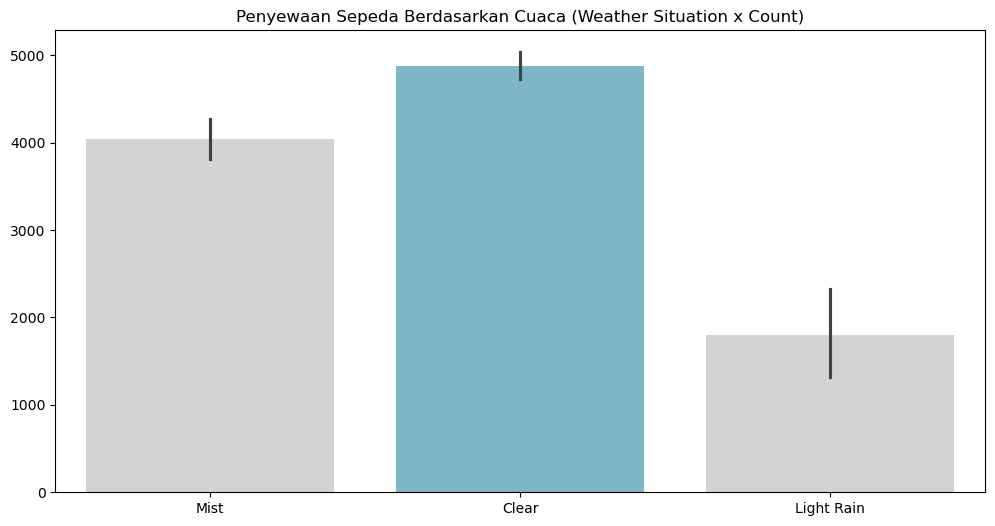

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_of_week,z_score,weathersit_name,season_name
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday,-1.816709,Mist,Spring
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Sunday,-1.911691,Mist,Spring
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Monday,-1.628810,Clear,Spring
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Tuesday,-1.518858,Clear,Spring
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Wednesday,-1.499242,Clear,Spring


In [155]:
daily_df['weathersit_name'] = daily_df['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'})

colors = ["#D3D3D3", "#72BCD4", "#D3D3D3"]

plt.figure(figsize=(12, 6))
sns.barplot(x='weathersit_name', y='cnt', data=daily_df, palette=colors)
plt.title('Penyewaan Sepeda Berdasarkan Cuaca (Weather Situation x Count)')
plt.ylabel(None)
plt.xlabel(None)
plt.show()
daily_df.head(5)

### Pertanyaan 2:

/var/folders/98/ls8tp8yx4c79w6nqhktq3vnw0000gn/T/ipykernel_94363/3605123755.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_name', y='cnt', data=daily_df, palette=colors)


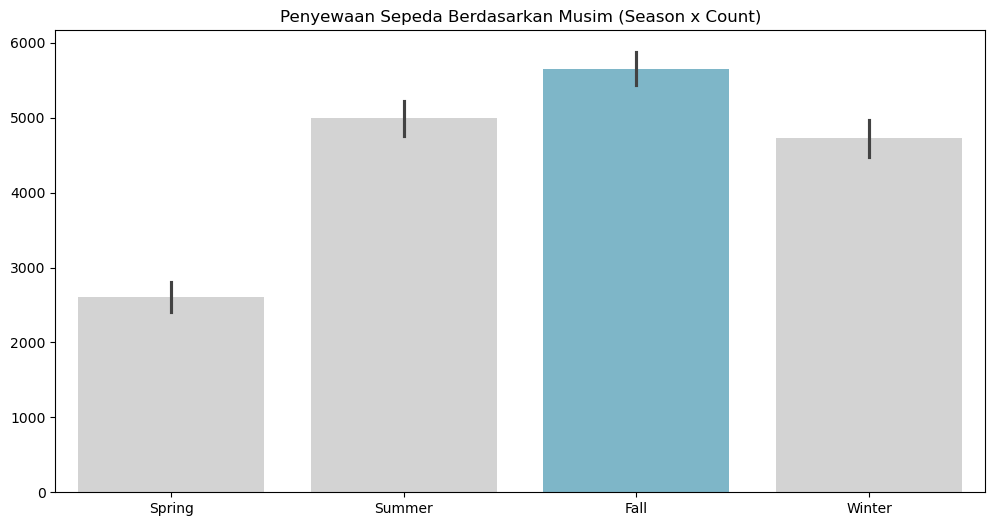

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_of_week,z_score,weathersit_name,season_name
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday,-1.816709,Mist,Spring
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Sunday,-1.911691,Mist,Spring
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Monday,-1.628810,Clear,Spring
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Tuesday,-1.518858,Clear,Spring
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Wednesday,-1.499242,Clear,Spring


In [148]:
daily_df['season_name'] = daily_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

colors = ["#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3"]
plt.figure(figsize=(12, 6))
sns.barplot(x='season_name', y='cnt', data=daily_df, palette=colors)
plt.title('Penyewaan Sepeda Berdasarkan Musim (Season x Count)')
plt.ylabel(None)
plt.xlabel(None)
plt.show()
daily_df.head(5)

### Pertanyaan 3:

/var/folders/98/ls8tp8yx4c79w6nqhktq3vnw0000gn/T/ipykernel_94363/3116387189.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='cnt', data=daily_df.sort_values(by='dteday'), palette=colors)


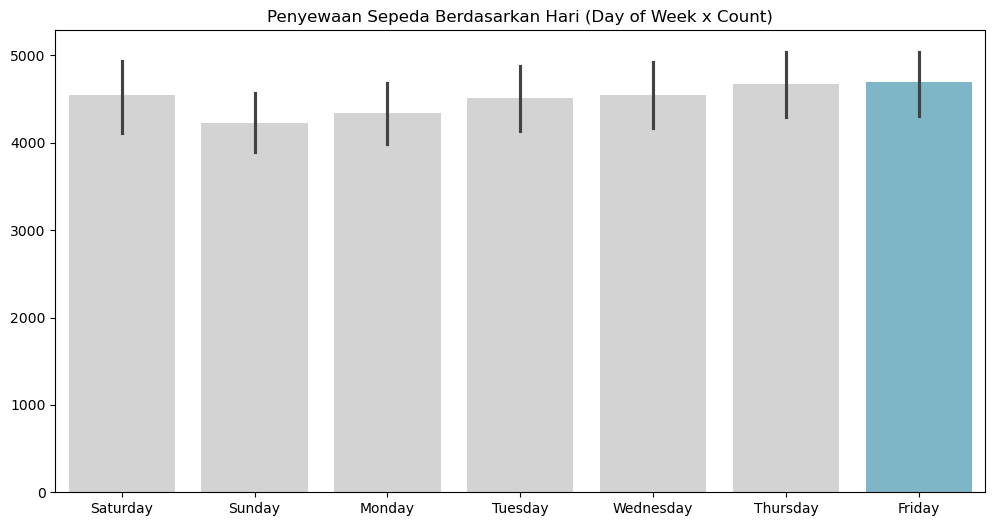

In [149]:
daily_df['day_of_week'] = daily_df['dteday'].dt.day_name()

colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4"]
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='cnt', data=daily_df.sort_values(by='dteday'), palette=colors)
plt.title('Penyewaan Sepeda Berdasarkan Hari (Day of Week x Count)')
plt.ylabel(None)
plt.xlabel(None)
plt.show()

### Pertanyaan 4:

/var/folders/98/ls8tp8yx4c79w6nqhktq3vnw0000gn/T/ipykernel_94363/1265032526.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hr', y='cnt', data=hourly_df, palette='viridis')


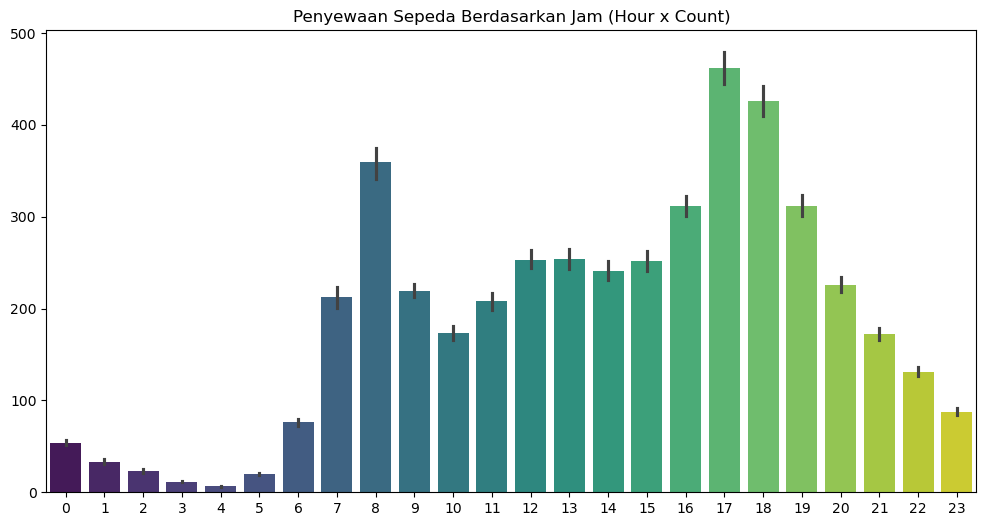

In [150]:
hourly_df['hr'] = hourly_df['hr'].astype('category')
plt.figure(figsize=(12, 6))
sns.barplot(x='hr', y='cnt', data=hourly_df, palette='viridis')
plt.title('Penyewaan Sepeda Berdasarkan Jam (Hour x Count)')
plt.ylabel(None)
plt.xlabel(None)
plt.show()

### Pertanyaan 5:

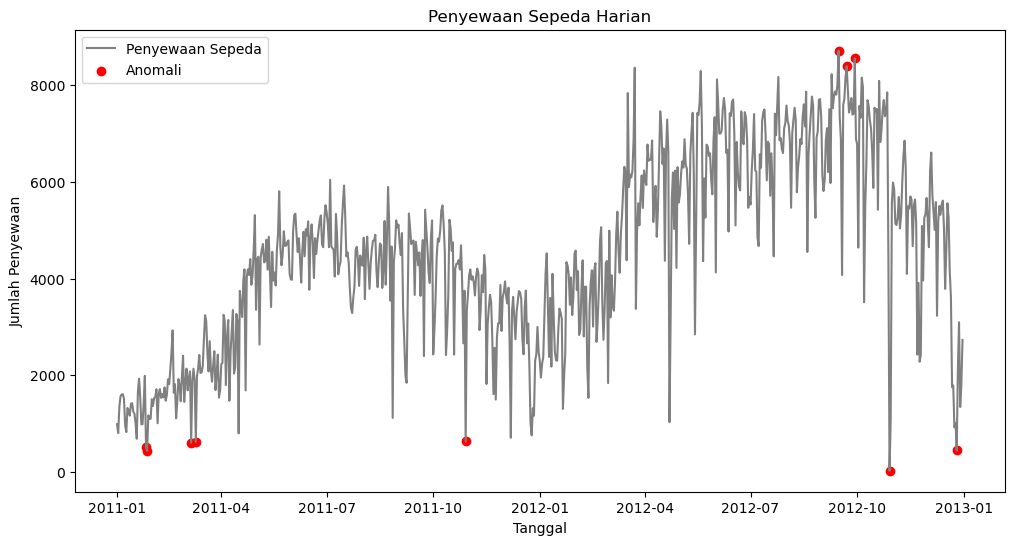

In [151]:
# Menampilkan anomali data denga z-score > 2 atau z-score < -2
plt.figure(figsize=(12, 6))
plt.plot(daily_df['dteday'], daily_df['cnt'], color='gray', label='Penyewaan Sepeda')
plt.scatter(anomalies['dteday'], anomalies['cnt'], color='red', label='Anomali')
plt.title('Penyewaan Sepeda Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.legend()
plt.show()

### Pertanyaan 6:

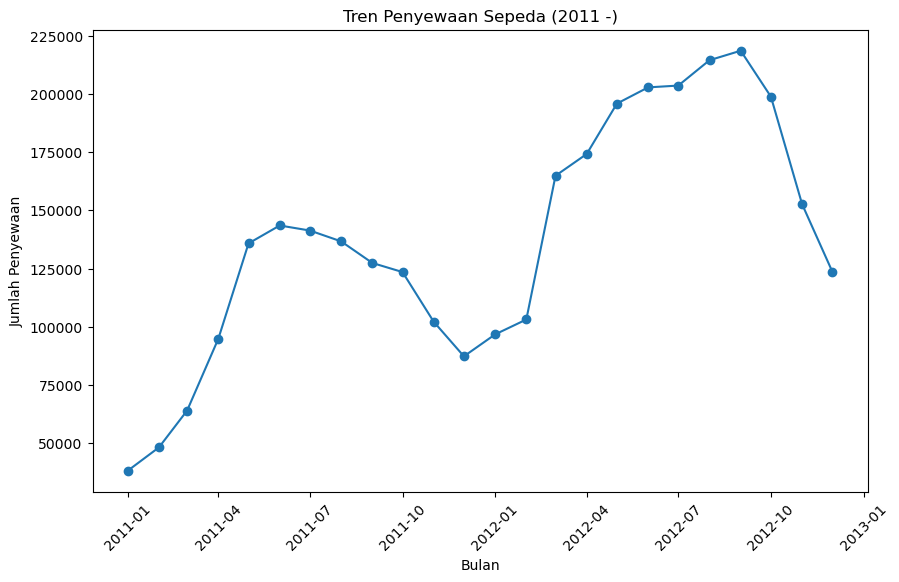

In [152]:
# visualisasi tren bulanan
plt.figure(figsize=(10, 6))
monthly_trend = daily_df.groupby(daily_df['dteday'].dt.to_period('M')).agg({'dteday': 'min', 'cnt': 'sum'})

plt.plot(monthly_trend['dteday'], monthly_trend['cnt'], marker='o')
plt.title('Tren Penyewaan Sepeda (2011 -)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 7:

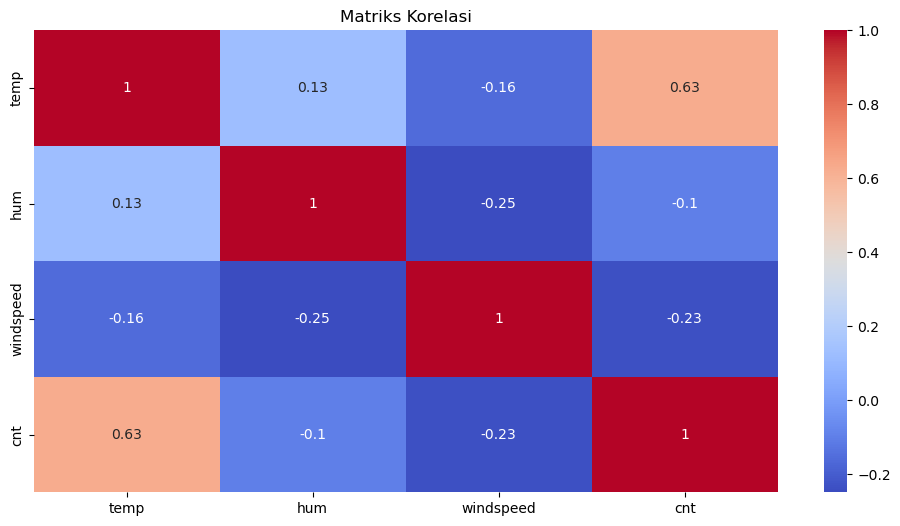

In [153]:
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

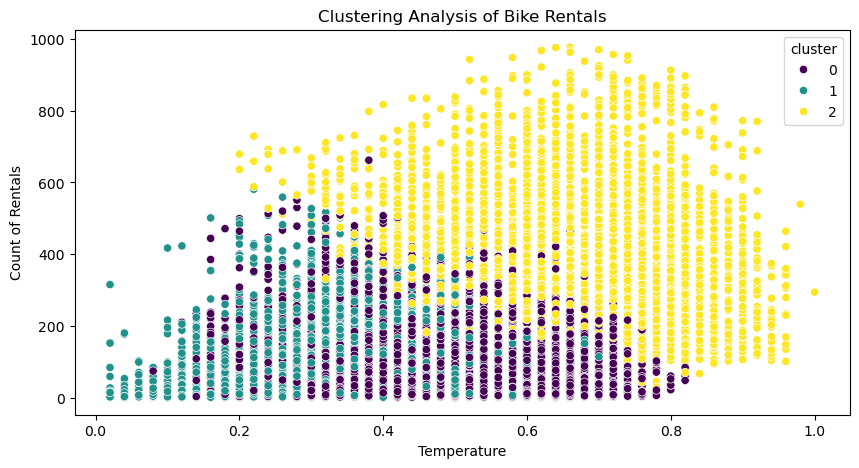

In [154]:
# Memilih fitur yang relevan untuk clustering
features = hourly_df[['temp', 'hum', 'windspeed', 'cnt']]

# Melakukan normalisasi data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Menggunakan KMeans untuk clustering
kmeans = KMeans(n_clusters=3, random_state=42)
hourly_df['cluster'] = kmeans.fit_predict(scaled_features)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 5))
sns.scatterplot(x=hourly_df['temp'], y=hourly_df['cnt'], hue=hourly_df['cluster'], palette='viridis')
plt.title('Clustering Analysis of Bike Rentals')
plt.xlabel('Temperature')
plt.ylabel('Count of Rentals')
plt.show()

**Insight:**
- Berdasarkan grafik ini, cuaca cerah (Clear) menjadi faktor utama dengan jumlah penyewaan sepeda terbanyak, mencapai lebih dari 4.500 unit. Cuaca berawan (Mist) menyusul di urutan kedua dengan angka penyewaan yang lebih rendah, sementara cuaca hujan ringan (Light Rain) mencatatkan angka penyewaan paling sedikit, menunjukkan bahwa orang lebih suka menyewa sepeda saat cuaca cerah.

- Grafik ini menunjukkan bahwa musim gugur (Fall) memiliki jumlah penyewaan sepeda tertinggi, dengan lebih dari 5.500 unit. Musim panas (Summer) mengikuti di urutan kedua, dengan angka penyewaan yang sedikit lebih rendah. Sementara itu, musim dingin (Winter) dan musim semi (Spring) mencatatkan angka penyewaan yang paling rendah, dengan musim semi berada di urutan terbawah.

- Berdasarkan grafik ini, hari Jumat adalah hari yang paling ramai dalam hal penyewaan sepeda. Setelah Jumat, Kamis dan Sabtu mengikuti dengan angka penyewaan yang juga tinggi. Sementara itu, Rabu, Selasa, dan Senin berada di posisi berikutnya. Yang menarik, meskipun akhir pekan sering dianggap waktu favorit untuk aktivitas luar ruangan, hari Minggu justru mencatatkan jumlah penyewaan sepeda paling sedikit.

- Pada grafik ini, selain hari dan musim, waktu juga menunjukkan peran penting dalam tren penyewaan sepeda. Jam 17.00 hingga 18.00 (sore hari) adalah waktu puncak penyewaan, kemungkinan besar karena banyak orang yang pulang kerja. Jam 08.00 (pagi hari) mencatatkan lonjakan penyewaan kedua, mungkin karena banyak orang yang mulai memulai aktivitas harian mereka. Sebaliknya, pada jam 04.00 dini hari, tingkat penyewaan sangat rendah, karena sebagian besar orang belum aktif beraktivitas.

- Grafik ini juga menunjukkan adanya 10 anomali signifikan dalam pola penyewaan sepeda. Salah satunya adalah pada 15 September 2012, di mana terjadi lonjakan penyewaan yang besar, yang berkaitan dengan acara tahunan 'H Street Festival', sebuah festival jalanan besar di Washington, D.C. Sebaliknya, pada 29 Oktober 2012, terjadi penurunan drastis, yang bertepatan dengan datangnya "Hurricane Sandy", badai besar yang memaksa banyak orang membatasi aktivitas luar ruangan. Selain dua peristiwa besar ini, ada beberapa insiden lain yang juga mempengaruhi pola penyewaan sepeda pada tanggal-tanggal tertentu.

- Selama periode 2011 hingga 2012, grafik penyewaan sepeda menunjukkan tren peningkatan yang konsisten, terutama jika dilihat dari akumulasi bulanan pada grafik tersebut. Namun, ada penurunan signifikan setiap bulan Oktober di kedua tahun tersebut, yang terlihat jelas pada grafik, dan kemungkinan besar disebabkan oleh faktor eksternal seperti cuaca atau acara tertentu.

- Analisis lebih lanjut dari grafik menunjukkan bahwa suhu memiliki pengaruh besar terhadap jumlah penyewaan sepeda. Suhu yang lebih hangat cenderung meningkatkan jumlah penyewaan. Meskipun kelembaban dan kecepatan angin juga berpengaruh, dampaknya jauh lebih kecil dibandingkan suhu. Grafik scatterplot menunjukkan hubungan antara suhu dan jumlah penyewaan sepeda, dibagi menjadi tiga cluster: cluster 0 (ungu) dengan suhu rendah dan penyewaan sedikit, cluster 1 (hijau) dengan suhu menengah dan variasi penyewaan, dan cluster 2 (kuning) dengan suhu hangat dan penyewaan tertinggi. Semakin tinggi suhu, semakin banyak orang yang menyewa sepeda. Anomali atau outlier yang terlihat pada grafik juga menunjukkan adanya penyewaan yang tidak mengikuti pola umum, kemungkinan besar karena faktor-faktor eksternal seperti acara khusus atau cuaca ekstrem.

## Analisis Lanjutan (Opsional)

## Conclusion

**Insight:**
- Berdasarkan analisis yang dilakukan, cuaca cerah ternyata menjadi faktor utama yang mendorong tingginya jumlah penyewaan sepeda, di mana pada kondisi ini jumlah penyewaan mencapai angka tertinggi dibandingkan kondisi cuaca lainnya. Setelah cuaca cerah, cuaca berawan menduduki posisi kedua dalam jumlah penyewaan sepeda, diikuti oleh cuaca dengan hujan ringan, dan yang paling sedikit adalah ketika cuaca badai.

- Jika dilihat dari segi musim, musim gugur tampak mendominasi dalam hal jumlah penyewaan sepeda. Pada musim ini, penyewaan sepeda berada pada puncaknya, jauh lebih tinggi dibandingkan dengan musim-musim lainnya. Setelah musim gugur, musim panas menyusul dengan jumlah penyewaan yang cukup tinggi, diikuti oleh musim dingin, dan akhirnya musim semi yang mencatat jumlah penyewaan paling rendah.

- Dari analisis terhadap hari dalam seminggu, diketahui bahwa hari Jumat adalah hari yang mencatatkan jumlah penyewaan sepeda tertinggi. Setelah Jumat, hari Kamis dan Sabtu menyusul sebagai hari-hari dengan jumlah penyewaan yang juga tinggi, sedangkan hari Rabu, Selasa, dan Senin berada di posisi selanjutnya. Menariknya, hari Minggu mencatat jumlah penyewaan sepeda paling sedikit, meskipun secara umum akhir pekan sering dianggap sebagai waktu favorit untuk aktivitas luar ruangan.

- Selain faktor hari dan musim, waktu juga memainkan peran penting dalam tren penyewaan sepeda. Jam 17.00 hingga 18.00 (sore hari) merupakan waktu di mana jumlah penyewaan sepeda mencapai puncaknya, yang mungkin disebabkan oleh banyaknya orang yang pulang kerja pada jam-jam tersebut. Di urutan kedua, jam 08.00 (pagi hari) menunjukkan lonjakan penyewaan, kemungkinan besar karena banyak orang memulai aktivitas harian mereka. Sebaliknya, jam 04.00 dini hari menunjukkan tingkat penyewaan paling rendah, di mana mayoritas orang belum aktif beraktivitas pada waktu tersebut.

- Analisis data juga mengungkap adanya 10 anomali yang signifikan terkait penyewaan sepeda. Sebagai contoh, pada tanggal 15 September 2012, terjadi lonjakan penyewaan sepeda yang signifikan, yang dikaitkan dengan acara tahunan 'H Street Festival', sebuah event jalanan besar yang menarik banyak pengunjung di Washington, D.C. Namun, di sisi lain, terdapat penurunan drastis pada tanggal 29 Oktober 2012 yang bertepatan dengan terjadinya "Hurricane Sandy", salah satu badai besar yang memaksa banyak orang untuk membatasi aktivitas luar ruangan. Selain itu, masih terdapat beberapa insiden lain yang mempengaruhi pola penyewaan pada tanggal-tanggal tertentu.

- Selama periode dua tahun dari 2011 hingga 2012, tren penyewaan sepeda secara keseluruhan menunjukkan peningkatan yang konsisten, khususnya jika dilihat dari akumulasi bulanan. Namun, yang menarik adalah adanya penurunan signifikan yang terjadi setiap bulan Oktober di kedua tahun tersebut, yang kemungkinan besar disebabkan oleh faktor-faktor eksternal seperti cuaca atau event tertentu.

- Analisis lebih lanjut terhadap korelasi dan koefisien regresi menunjukkan bahwa suhu memiliki peran yang sangat signifikan dalam mempengaruhi jumlah penyewaan sepeda. Suhu yang lebih hangat cenderung meningkatkan jumlah penyewaan. Di sisi lain, meskipun kelembaban udara dan kecepatan angin juga memiliki pengaruh, pengaruh kedua faktor ini jauh lebih kecil jika dibandingkan dengan suhu. Dapat dilihat juga pembuktian pengaruh suhu pada visualisasi scatterplot ini menunjukkan hubungan antara suhu (temperature) dan jumlah penyewaan sepeda (count of rentals), dengan data dibagi menjadi tiga cluster: cluster 0 (ungu) yang mendominasi pada suhu rendah dengan jumlah penyewaan lebih sedikit, cluster 1 (hijau) yang mencerminkan penyewaan lebih bervariasi pada suhu menengah, dan cluster 2 (kuning) yang menunjukkan penyewaan tertinggi pada suhu hangat hingga panas. Semakin tinggi suhu, semakin meningkat pula jumlah penyewaan sepeda, yang terlihat dari dominasi cluster kuning pada suhu di atas 0.6. Dengan kata lain, suhu hangat berperan sebagai faktor signifikan yang mendorong permintaan penyewaan sepeda, sedangkan pada suhu yang lebih rendah jumlah penyewaan cenderung lebih sedikit. Anomali atau outliers yang terdeteksi pada grafik juga menunjukkan adanya beberapa penyewaan yang tidak mengikuti pola umum, mungkin disebabkan oleh faktor-faktor eksternal seperti acara khusus atau cuaca ekstrem.